In [1]:
# Import tensorflow and all the libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [2]:
# Load the data from the folder assets which is in the form of 10 digits from 0 to 9 in the form of a dataloader
# The data is in the form of images of 28x28 pixels

DATADIR = "assets"

CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (28, 28))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)

create_training_data()


In [3]:
# Shuffle the data so that the model does not learn the order of the data
random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 28, 28, 1)
y = np.array(y)


In [4]:
print(X.shape, y.shape)

(6299, 28, 28, 1) (6299,)


In [5]:
# Have training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5669, 28, 28, 1) (630, 28, 28, 1) (5669,) (630,)


In [7]:
# Build a VGG 3 model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

c:\Users\jaide\anaconda3\envs\mnist\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Draw the model architecture diagram
tf.keras.utils.plot_model(model)
# Plot it
model.summary()




You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
pip install visualkeras

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   ---------------------------------------- 45.0/45.0 kB 560.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer

c:\Users\jaide\anaconda3\envs\mnist\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


In [45]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 5.9757e-05 - val_accuracy: 0.9921 - val_loss: 0.0182
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 4.3288e-05 - val_accuracy: 0.9937 - val_loss: 0.0181
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 4.0631e-05 - val_accuracy: 0.9937 - val_loss: 0.0181
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 4.0560e-05 - val_accuracy: 0.9937 - val_loss: 0.0181
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 2.8897e-05 - val_accuracy: 0.9937 - val_loss: 0.0181
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 1.9584e-05 - val_accuracy: 0.9937 - val_loss: 0.0180
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 2.1228e-05 - val_accuracy: 0.9937 - val_loss: 0.0180
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.000

In [47]:
# Test the model

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


20/20 - 0s - 6ms/step - accuracy: 0.9952 - loss: 0.0172

Test accuracy: 0.9952380657196045

Test loss: 0.017204776406288147


In [48]:
# Save the model
model.save("model.keras")


In [49]:
# load the model 

model2 = tf.keras.models.load_model("model.keras")

# Test the model
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)

20/20 - 0s - 24ms/step - accuracy: 0.9952 - loss: 0.0172


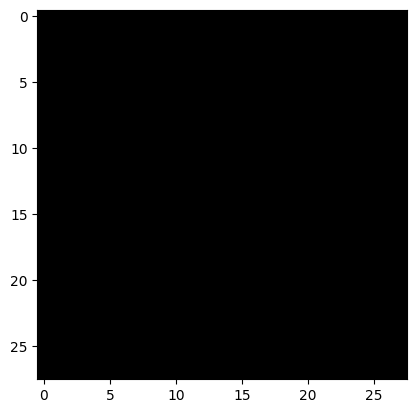

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[14.085848    0.7520374  -5.7682123  -1.7274649  -3.0900006  -1.5676267
  -1.3581874   0.18506682 -2.7309496  -3.8887846 ]]
0


In [50]:
# Pick a number from the folder, plot the number and predict using model2

img = cv2.imread("assets/0/00.jpeg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
plt.imshow(img, cmap='gray')
plt.show()

img = np.array(img).reshape(-1, 28, 28, 1)

predictions = model2.predict(img)

print(predictions)

# Get the maximum value from the predictions
print(np.argmax(predictions))

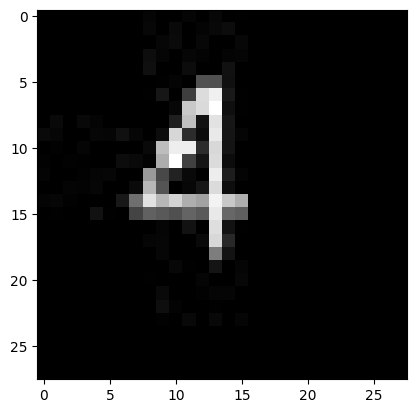

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[ -0.89611906   1.3804021    6.136644     9.162972    37.61111
   -1.0218433    7.430334   -14.723456    -1.213322     6.000896  ]]
Prediction: 4


In [52]:
# Pick a number from the folder, plot the number and predict using model2

img = cv2.imread("assets/4/0_0_1023.jpeg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
plt.imshow(img, cmap='gray')
plt.show()

img = np.array(img).reshape(-1, 28, 28, 1)

predictions = model.predict(img)

print(predictions)

# Get the maximum value from the predictions
print("Prediction:", np.argmax(predictions))